In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab
from tqdm import trange
import scipy
from scipy.stats import bernoulli

In [2]:
def is_consensus(x, fix):
    res = True
    count = 0
    for i in range(1, len(x)):
        if x[i-1] != x[i]:
            count += 1
    if count > 2:
        res = False
    return res
def clusters(x0,eps2, fix = {}):
    count = [x0[0]]
    l=0
    for i in range(1,len(x0)):
        if i not in fix:
            for j in range (len(count)):
                if np.abs(x0[i] - count[j])<eps2:
                    l+=1
            if l==0:
                count.append(x0[i])
            l=0
    return np.array(count)

In [3]:
def compare (x ,y, eps):
    result = 1
    for k in range(len(x)):
        if abs(x[k] - y[k]) >= eps:
            result = 0
    return bool(result)

def insert_agent(x, ind):
    if  ind != 0:
        opinion = (x[ind]+x[ind-1])/2
    else:
        opinion = x[ind]
    _X = np.insert(x,ind,opinion)
    return _X

def new_op(x, i, eps):
    count = 1
    summ = x[i]
    for k in range(len(x)):
        if (abs(x[i] - x[k]) < eps) and (i != k):
            #print(i, j, x[i], x[j])
            summ += x[k]
            count += 1
    #print(summ, count)
    return summ/count

def pair_count (x0, fix = {}):
    count = [0, 0]
    for i in range(len(x0)):
        if i not in fix:
            if x0[i] >= 0.5:
                count[0] += 1
            else:
                count[1] += 1
    #count[0] = count[0]/len(x0)
    #count[1] = count[1] / len(x0)
    return count

def Hen_Kr (x0, eps, eps2,fix, v):
    X = [np.array(x0)]
    t = 0
    while True:
        X.append(np.zeros(len(x0)))
        t += 1
        for j in range(len(x0)):
            if j not in fix:
                X[t][j] = new_op(X[t - 1], j, eps)
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t

def find_fix(x0):
    diff = 1
    ind = 0
    for j in range (len(x0)):
        if (x0[j] - 0.5 < diff) and (x0[j] - 0.5 >= 0):
            ind = j
            diff = abs(0.5 - x0[j])
    return ind

In [4]:

def Hen_Kr_actm2_statistics (x0, eps, eps2,fix, v, prob):
    X = [np.array(x0)]
    t = 0
    consensus_value = 0
    consensus_time = 0
    consensus_flag = True
    pos0_6_time = 0
    pos0_6_flag = True
    while True:
        X.append(np.zeros(len(x0)))
        active_mask = bernoulli.rvs(p=prob, size=n)
        t += 1
        for j in range(len(x0)):
            if j not in fix and active_mask[j]==1:
                X_prev = np.copy(X[t -1])
                X_prev[active_mask==0]=0-2*eps - 2*eps2 
                X[t][j] = new_op(X_prev, j, eps)
                X[t][active_mask==0]=X[t-1][active_mask==0]
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if consensus_flag:
            ctrs = clusters(X[t],eps,fix_control)
            if len(ctrs) ==1:
                consensus_flag = False
                consensus_time = t
                consensus_value = X[t][0]
        if pos0_6_flag and np.all(X[t]>= 0.6):
            pos0_6_time = t
            pos0_6_flag = False
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t, consensus_value, consensus_time, pos0_6_time

In [6]:
eps = 0.2
eps2 = 0.001
n = 50
p = 1

In [32]:
cons_value_data = np.asarray([])
cons_time_data = np.asarray([])
positive_time_data = np.asarray([])
stop_time_data = np.asarray([])

cluster_numbers = np.zeros(n)


#cl_rs = np.zeros(n, dtype=object)
cl_rs = np.zeros(n, dtype=list)

count_experiments = 80000


prob=1

fix_control = set({})
v_c = 0

In [33]:
for i in trange(count_experiments):
    
    x0 = np.random.sample(n)
    x0.sort()
        
    X, t, cons_value, cons_time, positive_time = Hen_Kr_actm2_statistics(x0, eps, eps2, fix_control,v_c, prob)
    cltrs = clusters(X[t],eps,fix_control)
    
    cons_value_data = np.append(cons_value_data, cons_value)
    cons_time_data = np.append(cons_time_data, cons_time)
    positive_time_data = np.append(positive_time_data, positive_time)
    stop_time_data = np.append(stop_time_data, t)
    cluster_numbers[len(cltrs)-1] +=1
    
    cl_rs[len(cltrs)-1] = np.append(cl_rs[len(cltrs)-1], cltrs)
        



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.76it/s]

Average consensus time: 3.767
Average consensus value in consensus time: 0.3578681102039066
Average time when consensus reached 0.6: 0.14
Average stop time: 6.063
Average number of clusters: 20.0
[895. 105.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]
[array([0.        , 0.4785616 , 0.45591218, 0.45969966, 0.42206802,
        0.54001042, 0.5305945 , 0.40150191, 0.50571244, 0.56246152,
        0.49531779, 0.43907849, 0.57606875, 0.45795856, 0.51363675,
        0.54107514, 0.53029869, 0.57745591, 0.40676614, 0.49329447,
        0.59356219, 0.49548779, 0.44397363, 0.40311408, 0.50323042,
        0.48026045, 0.42643399, 0.48836785, 0.46892246, 0.51279254,
        0.48956034, 0.51554701, 0.55737211, 0.38866292, 0.51457921,
        0.44380173, 0.45783901, 0.49198662, 0.55122391, 0.5497715 ,
     

In [143]:
import scipy
import scipy.stats as stats
from scipy.stats import bernoulli

In [ ]:
st, pv=stats.ks_2samp(stats.norm.rvs(0.5,0.01, size=len(np.array(clv0))),np.array(clv0), mode='auto')
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(clv0), density = True, bins=100, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)

plt.plot(x, stats.norm.pdf(x,0.5,0.01), color ="orange", label='norm')
plt.xlabel('opinion')
plt.ylabel('frequency')
plt.title(f'consensus, Kolmogorov–Smirnov test: statistic={st:.3}, pvalue={pv:.3}')
plt.legend()

plt.show()

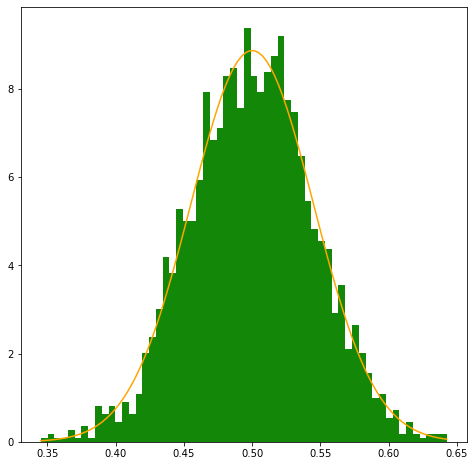

KstestResult(statistic=0.013086642599277979, pvalue=0.9913886879947673)

In [294]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cl_rs[0][1:]), density = True, bins=60, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)
plt.plot(x, stats.norm.pdf(x,0.5,0.045), color ="orange")
plt.xlabel('opinion')
plt.ylabel('frequency')
plt.show()
stats.ks_2samp(stats.norm.rvs(0.5,0.045, size=len(np.array(cl_rs[0][1:]))),np.array(cl_rs[0][1:]), mode='auto')

In [20]:
import statistics

statistics.variance(cl_rs[0][1:]), statistics.pvariance(cl_rs[0][1:])

(0.002093060761813041, 0.0020587482903079092)

In [34]:
print(cluster_numbers[:4], np.sum(cluster_numbers[:4]), cluster_numbers[0]/np.sum(cluster_numbers[:4]))

[895. 105.   0.   0.] 1000.0 0.895


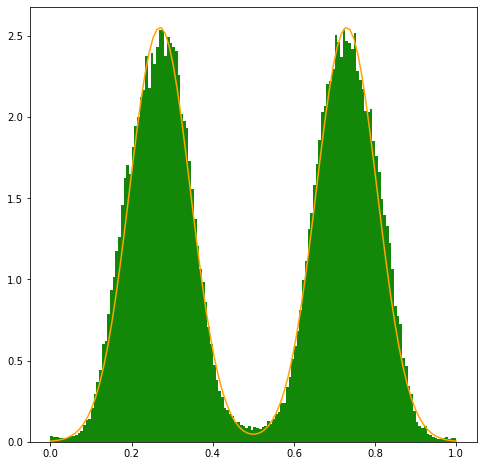

KstestResult(statistic=0.01204796272959864, pvalue=4.944399743074684e-07)

In [304]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cl_rs[1][1:]), density = True, bins=150, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)

pdf = stats.norm.pdf
rvs = stats.norm.rvs
bimodal_pdf = pdf(x, loc=0.27, scale=0.075) * (float(0.48)) + \
              pdf(x, loc=0.73, scale=0.075) * (float(0.48))

bimodal_rvs = rvs(loc=0.27, scale=0.075, size=int((cl_rs[1][1:].shape[0])/2))
bimodal_rvs = np.append(bimodal_rvs, rvs(loc=0.73, scale=0.075, size=int((cl_rs[1][1:].shape[0])/2)))

plt.plot(x, bimodal_pdf, color ="orange")
plt.show()

stats.ks_2samp(bimodal_rvs,np.array(cl_rs[1][1:]), mode='auto')

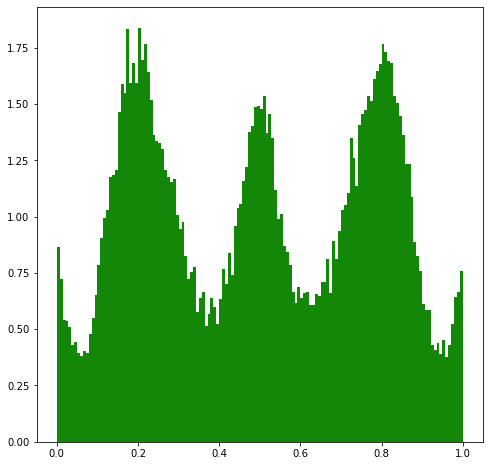

In [306]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cl_rs[2][1:]), density = True, bins=140, stacked = True, color = '#138808')

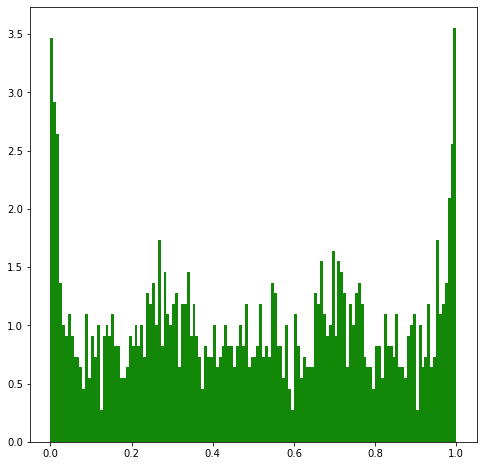

In [307]:
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(cl_rs[3][1:]), density = True, bins=140, stacked = True, color = '#138808')

In [310]:
np.save('cluster_n.npy', cluster_numbers)
np.save('cluster_v_0.npy', cl_rs[0])
np.save('cluster_v_1.npy', cl_rs[1])
np.save('cluster_v_2.npy', cl_rs[2])
np.save('cluster_v_3.npy', cl_rs[3])

In [131]:
cln = np.load('cluster_num.npy', mmap_mode = 'r')
cln==cluster_numbers

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [137]:
clv0 = np.load('cluster_val_0.npy', mmap_mode = 'r')
clv0==cl_rs[0]

array([ True,  True,  True, ...,  True,  True,  True])

In [139]:
clv1 = np.load('cluster_val_1.npy', mmap_mode = 'r')
clv1==cl_rs[1]

array([ True,  True,  True, ...,  True,  True,  True])

In [140]:
clv2= np.load('cluster_val_2.npy', mmap_mode = 'r')
clv2==cl_rs[2]

array([ True,  True,  True, ...,  True,  True,  True])

In [141]:
clv3 = np.load('cluster_val_3.npy', mmap_mode = 'r')
clv3==cl_rs[3]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,